# LAPLACE TRANSFORMS FOR REACTION NETWORKS

In [1]:
try:
    import controlSBML as ctl
except:
    !pip -q install controlSBML
    import controlSBML as ctl
from controlSBML.util import makeSimulationTimes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import tellurium as te
print("controlSBML version: " + ctl.__version__)

controlSBML version: 0.2.7


# Review

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$

Find the transfer function for $\frac{S_3}{S_1}$

## Steps
1. Specify the input and output for the transfer function.
1. Write the system equations.
1. Convert to Laplace transforms.
1. Solve for the output LT in terms of the input LT and form the ratio.

# Nonlinear

$S_1 \xrightarrow[\text{}]{k_1 S_1 } S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_1 S_2} S_3$

Find the transfer function for $\frac{S_3}{S_1}$

# Branching

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$,
$S_2 \xrightarrow[\text{}]{k_3 S_2} S_4$


Find the transfer function for $\frac{S_3}{S_1}$

# Reversible reaction

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$,
$S_3 \xrightarrow[\text{}]{k_3 S_3} S_2$,
$S_3 \xrightarrow[\text{}]{k_4 S_3} \emptyset$

Find the transfer function for $\frac{S_3}{S_1}$

**Step 1: Write the state equations**
\begin{eqnarray}
\dot{S_1} & = & -k_1 S_1 \\
\dot{S_2} & = & k_1 S_1 - k_2 S_2 + k_3 S_3 \\
\dot{S_3} & = & k_2 S_2 - k_3 S_3 \\
\end{eqnarray}

**Step 2: Construct Laplace Transforms**
\begin{eqnarray}
s S_1 (s) & = & -k_1 S_1 (s) \\
s S_2 (s)  & = & k_1 S_1(s) - k_2 S_2(s) + k_3 S_3(s) \\
s S_3(s)  & = & k_2 S_2 (s) - k_3 S_3(s) -k_4 S_3(s) \\
\end{eqnarray}

**Step 3: Express $S_3$ in terms of $S_1$**
\begin{eqnarray}
s S_2 (s)  & = & k_1 S_1(s) - k_2 S_2(s) + k_3 S_3(s) \\
S_2 (s) & = & \frac{k_1 S_1(s) + k_3 S_3(s)}{s + k_2} \\
S_3 (s) & = & \frac{k_2 S_2 (s)}{s + k_3 + k_4} \\
S_3 (s) & = & \frac{k_2}{s + k_3 + k_4} \frac{k_1 S_1(s) + k_3 S_3(s)}{s + k_2} \\
S_3 (s) (1 - \frac{k_3}{s + k_2})  & = & \frac{k_2}{s + k_3 + k_4} \frac{k_1 S_1(s)}{s + k_2} \\
S_3 (s)  & = &  S_1(s)\frac{k_2}{s + k_3 + k_4} \frac{k_1}{s + k_2} \frac{s + k_2}{s + k_2 - k_3} \\
\end{eqnarray}

In [2]:
k1 = 1; k2 =2; k3 = 2.5; k4 = 1
k2/(k3 + k4)*(k1/k2)*(k2/(k2 - k3))

-1.1428571428571428

# Simulation

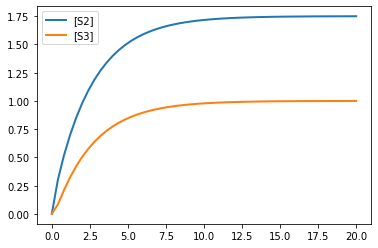

In [18]:
MODEL = """
J1: $S1 -> S2; k1*$S1
J2: S2 -> S3; k2*S2
J3: S3 -> S2; k3*S3
J4: S3 -> ; k4*S3
k1 = 1
k2 = 2
k3 = 2.5
k4 = 1
$S1 = 1
S2 = 0
S3 = 0
"""
RR = te.loada(MODEL)
RR.simulate(0, 20)
RR.plot()

In [16]:
ctlsb = ctl.ControlSBML(MODEL, input_names=["S1"], output_names=["S3"])
tf = ctlsb.makeTransferFunction()

In [17]:
tf.dcgain()

0.9999999999999996